# <center>LAB4 tutorial for Machine Learning <br > Linear Regression</center>

> The document description are designed by JIa Yanhong in 2022. Sept. 22th

## Objective

- Master the  linear regression algorithm.
- Understanding Gradient Descent
- Polynomial Regression
- Learn how to evaluate regression models
- Complete the LAB assignment and submit it to BB.


## 1 Linear Regression
### 1.1 Conceptual Overview

Linear Regression is **“supervised” “regression”** algorithm.

<center><img src="images/classical-ml.png" alt=" " style="zoom:80%;" /></center>

Supervised meaning we use labeled data to train the model.

<center><img src="images/supervised-vs-unsupervised.png" alt="supervised-vs-unsupervised" style="zoom:150%;" /> </center>

Regression meaning we predict a numerical value, instead of a “class”.
<center><img src="images/p1.png" alt="p1 " style="zoom:150%;" /> </center>





### 1.2 Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. 

We will define a linear relationship between these two variables as follows:
$$ Y=\theta _{0}+\theta _{1}x_{1}$$ 


This is the equation for a line that you studied in high school. $\theta _{1}$ is the slope of the line and $\theta _{0}$ is the y intercept.


<center><img src="images\p12.png" alt="p12 " style="zoom:100%;" /> </center>
When there are multiple independent variables, the linear relationship becomes as follows:

$$y=\theta _{0}+\theta _{1}x_{1}+\theta _{2}x_{2}+...+\theta _{n}x_{n}$$


<center><img src="images\p6_.png" alt="p6 " style="zoom:70%;" /> </center>

Let **X** be the independent variable and **Y** be the dependent variable. The general form of the model's prediction:

$$y\hat{}=h_{\theta }(x)=\theta _{0}+\theta _{1}x_{1}+\theta _{2}x_{2}+...+\theta _{n}x_{n}=\theta ^{T}\cdot x$$
$\theta$ is the model’s parameter vector, containing the bias term $\theta _{0}$ and the feature weights $\theta _{1}$ to $\theta _{n}$. (n = number of features).

$\theta ^{T}\cdot x$ is the dot product of the vectors $\theta$ and $x$, which is, of course, equal to $\theta _{0}+\theta _{1}x_{1}+\theta _{2}x_{2}+...+\theta _{n}x_{n}$.

Today we will use this equation to train our model with a given dataset and predict the value of **y** for any given value of **x**.

Our challenge is to determine the value of $\theta$. 
For a single variable, such that the line corresponding to those values is the best fitting line .
For multiple variables, such as 2 variables, the surface corresponding to these values is the surface of best fit.

<center><img src="images\p8.png" alt="p8 " style="zoom:120%;" /></center>

### 1.3 Cost Function


Cost Function evaluates the model’s predictions and tells us how accurate are the model’s predictions. The lower the value of the cost function, better accurate the predictions of the model. They are many cost functions to choose, but we will use the Mean Squared Error (MSE) cost function.

The MSE function calculates the average of the squared difference between the prediction and the actual value (y).

$$J(\theta )=MSE=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta }(x_{i})-y_{i})^{2}$$
> $x_{i}$ :the features of $i_{th}$ example 
> 
> $y_{i}$ : the label of the $i_{th}$ example
> 
> $m$ : total number of instances in your dataset



### 1.4 Least-squares estimation

Now that we have determined the cost function, the only thing left to do is minimize it. 
This is done by finding the partial derivative of $J(\Theta )$, equating it to 0 and then finding an expression for $\Theta$ .

The loss function can be written as:

\begin{aligned} 
J(\theta )&=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta }(x_{i})-y_{i})^{2}\\
&=\frac{1}{2m}\sum_{i=1}^{m}(\theta ^{T}\cdot x-y_{i})^{2} \\
&= \frac{1}{2m}(X\theta - y)^{T}(X\theta -y )
\end{aligned}


As the loss is convex the optimum solution lies at gradient zero. The gradient of the loss function is ：
\begin{aligned} 
\frac{\partial  J(\theta )}{\partial  \theta } 
&= \frac{\partial  \frac{1}{2m}(X\theta - y)^{T}(X\theta -y )}{\partial  \theta } \\
&= \frac{\partial  \frac{1}{2m}(\theta^{T}X^{T} - y^{T})(X\theta -y )}{\partial  \theta } \\
&= \frac{\partial  \frac{1}{2m}(\theta^{T}X^{T}X\theta-\theta^{T}X^{T}y-y^{T}X\theta+y^{T}y)}{\partial  \theta } \\
&= \frac{1}{2m}(2X^{T}X\theta-X^{T}y-(y^{T}X)^{T}) \\
&= \frac{1}{m}X^{T}X\theta - X^{T}y 
\end{aligned}


When X is a matrix of full rank, setting the gradient to zero produces the optimum parameter:
\begin{aligned} 
\theta ^{*}=(X^{T}X)^{-1}X^{T}y
\end{aligned}


#### Hands-on Coding

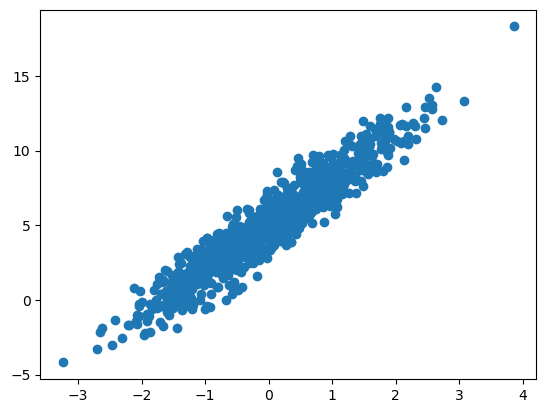

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.randn(1000, 1)

# y = 5 + 3 * X + Gaussian noise -> because in real-world it is very unlikely to get data that has a perfect linear relationship
y = 5 + 3 * X + np.random.randn(1000, 1)
plt.scatter(X, y)
plt.show()


In [3]:
X_b = np.c_[np.ones((1000, 1)), X]  # Adding the bias term which is equal to 1

# Dividing the data into train and test sets    
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

theta_optimize = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

#Output
#obtained feature weights  w0 = 5.04, w1 = 2.94
print(theta_optimize)

# Predicting new data with the obtained feature weights
y_pred = X_test.dot(theta_optimize)
r2_score(y_test, y_pred)


[[5.08703256]
 [2.93815133]]


0.8961012486926588

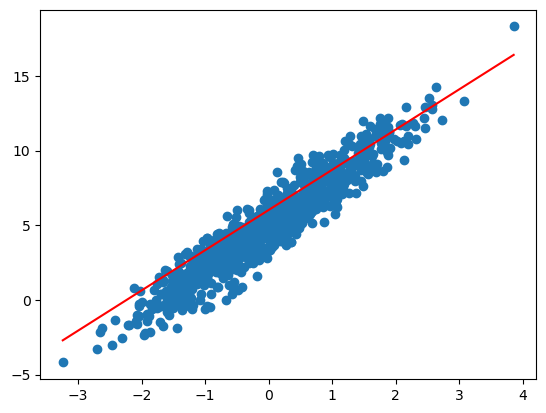

In [4]:
plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

You have seen it has predicted the feature weights very close to the actual values ($y = 5 + 3*X + Gaussian noise$), but due to the noise in the data it is unable to predict the exact values, but the predictions were close enough.

#### Disadvantages

- It is computationally expensive if you have a large number of features.
- If there are any redundant features in your data, they the matrix inversion in the normal equation is not possible. In that case, the inverse can be replaced by the pseudo inverse.

### 1.5 Gradient Descent

In this section you can learn how the gradient descent algorithm works and implement it from scratch in python.

Gradient Descent minimizes the cost function by iteratively moving in the direction of steepest descent, updating the parameters along the way.

<center><img src="images\gradient-descent-algorithm.jpg" alt="gradient-descent-algorithm " style="zoom:80%;" /></center>

In a real world example, it is similar to find out a best direction to take a step downhill.

<center><img src="images\downhill.png" alt="img " style="zoom:100%;" /></center>



We take a step towards the direction to get down. From the each step, you look out the direction again to get down faster and downhill quickly. 




To find the best minimum, repeat steps to apply various values for $\theta$. In other words, repeat steps until convergence.

<center><img src="images\p13.png" alt="img " style="zoom:110%;" /></center>


The choice of correct learning rate is very important as it ensures that Gradient Descent converges in a reasonable time. 
 

- If we choose α to be very small, Gradient Descent will take small steps to reach local minima and will take a longer time to reach minima.  

- If we choose **α to be very large**, Gradient Descent can overshoot the minimum. It may fail to converge or even diverge. 

<center><img src="images\learning-rate.png" alt="img " style="zoom:50%;" /></center>

#### Hands-on Coding
#####  implement Linear Regression from scratch


In [5]:
import numpy as np
from sklearn.metrics import r2_score

np.random.seed(42)

learning_rate = 0.1
iterations = 50
m = 100 # total number of samples
theta = np.random.randn(2,1) # random initialization
for iteration in range(iterations):
    gradient = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
    theta = theta - learning_rate * gradient

# Output
print(theta)


# array([[5.08703256],
#        [2.93815133]])

# Predicting new values with gradient descent
y_pred = X_test.dot(theta)
r2_score(y_test, y_pred)

[[5.08703256]
 [2.93815133]]


0.8961012486937926

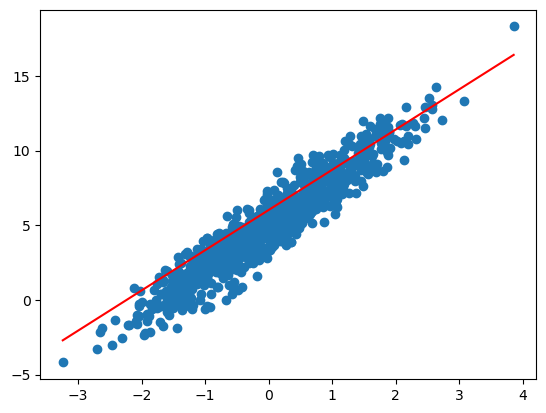

In [6]:
plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

##### Implementing Linear Regression in Scikit-Learn

In [39]:
from sklearn.linear_model import LinearRegression

X_train = X_train[:, 1] # The sklearn model will automatically add the bias term so we donot have to add it
X_test = X_test[:, 1]


linear_regression = LinearRegression()
linear_regression.fit(X_train.reshape(-1, 1), y_train)
print(linear_regression.intercept_)
# Output
#array([5.08703256])

print(linear_regression.coef_)
# Ouput
#array([[2.93815133]])

# Predicting new values and calculating the r2_score
linear_regression.score(X_test.reshape(-1, 1), y_test)

# output
#0.8961012486926588

[5.08703256]
[[2.93815133]]


0.8961012486926588

As you can see the values we got from the normal equation, gradient descent, sklearn are nearly the same.

#### Disadvantages

- There are possibilities for the gradient descent to stuck in a local minimum if you use another cost function that is not of a convex shape.
- You should find the appropriate value for the learning rate.


Well if you have read this far and everything makes sense pat yourself on the back!. You have learned all the underlying concepts of linear regression.
A

### 1.6 [Polynomial Regression](https://en.wikipedia.org/wiki/Polynomial_regression)

We use polynomial regression when the relationship between  the independent and dependent variables is nonlinear.


<center><img src="images\p2.png" alt="p2 " style="zoom:120%;" /></center>

This is accomplished by "exponentiating" our variable by taking it to powers greater than 1.

<center><img src="images\p3.png" alt="p3 " style="zoom:60%;" /></center>



In practice,  we  need to select the "degree" of the polynomial.

<center><img src="images\degree-of-polynomial.png" alt="degree-of-polynomial" style="zoom:120%;" /></center>

Our selection should seek to fit the current data well, and generalize to new data.

<center><img src="images\fit.png" alt="fit" style="zoom:120%;" /></center>

This challenge is known as the "bias variance tradeoff".

<center><img src="images\bias-variance-tradeoff.png" alt="bias-variance-tradeoff " style="zoom:100%;" /></center>

Bias usually caused by underfitting, Variance caused by overfitting.What can we do to solve this problem? 
- 1.Choose a better polynomial degree.
As we increase the degree, the bias decreases, but the variance increases. We want to stop where these two factors are minimized.
<center><img src="images\optimal-capacity.png" alt="optimal-capacity" style="zoom:120%;" /></center>

- 2. Regularization .Regularization in scikit learn is `RidgeRegression` ,which is  in [linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Use it if you need regularization in your model.
- 3. Use training set, validation set and test set or [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) to acquire a better model.

> Note:  polynomial regression is very sensitive to outliers, and we must take care when selecting the degree to avoid overfitting.

#### Hands-on Coding

In [46]:
#step 1: Import the required libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


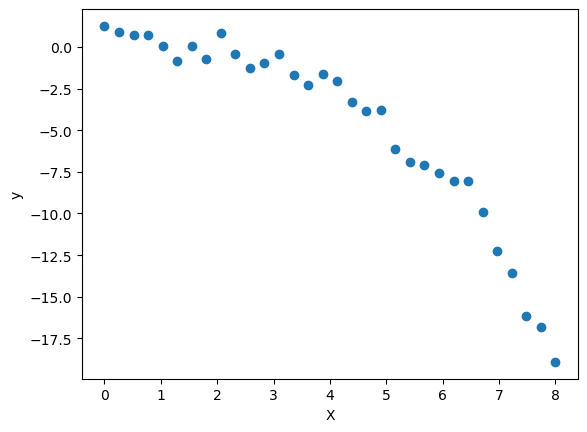

In [47]:
#step2: Load the data set. Here,We're generating data 
sample_cnt= 32
X = np.linspace(start = 0, stop = sample_cnt/4, num = sample_cnt).reshape(-1, 1)


# curve using polynomial
θ0, θ1, θ2, θ3 = 0.1, -0.02, 0.03, -0.04
y = θ0 + θ1*X + θ2*(X**2) + θ3*(X**3)
y +=  np.random.normal(0,1,size = sample_cnt).reshape(-1, 1)

plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.savefig('regu-0.png', dpi=200)
plt.show()


The equation: y = -2.174475549776708x+4.005254011115892
[4.00525401] [[-2.17447555]]
4.884418710922874


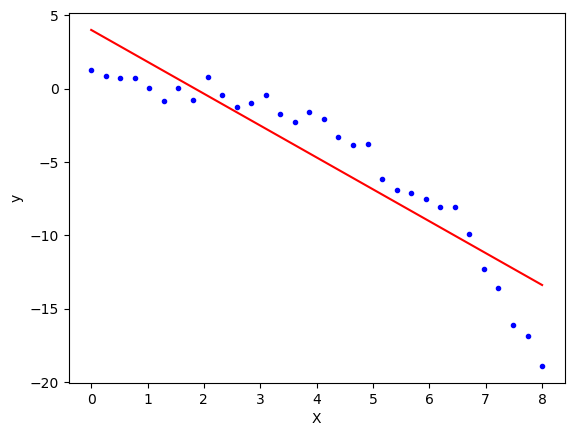

In [48]:
# step 3: using a linear regression model to predict
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

a = lin_reg.coef_[0][0]
b = lin_reg.intercept_[0]
plt.plot(X, y, 'b.')
plt.plot(X, y_pred,c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.savefig('regu-1.png', dpi=200)
print("The equation: y = {}x+{}".format(a,b))
#Calculate the error and evaluate the model
print(lin_reg.intercept_, lin_reg.coef_) 
print(mean_squared_error(y_pred, y)) 

[-0.1404052] [[ 1.03841034 -0.40161074]]


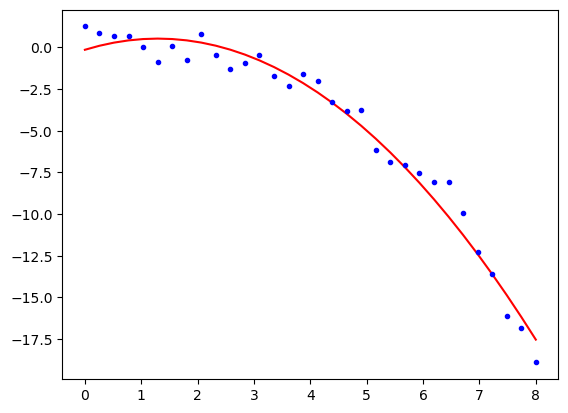

The equation: y = 1.0384103418901434x^2+-0.40161073645835654x+-0.14040520393810318
0.737484915804514


In [50]:
# Use a polynomial with degree of 2
ploy  = PolynomialFeatures(degree=2, include_bias=False)
X_2 = ploy .fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_2, y)
print(lin_reg.intercept_, lin_reg.coef_)  # [ 2.60996757] [[-0.12759678  0.9144504 ]]
a = lin_reg.coef_[0][0]
b = lin_reg.coef_[0][1]
c = lin_reg.intercept_[0]



y_plot = np.dot(X_2, lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X, y_plot, 'r-')
plt.plot(X, y, 'b.')
plt.savefig('regu-2.png', dpi=200)
plt.show()
print("The equation: y = {}x^2+{}x+{}".format(a,b,c))
print(mean_squared_error(y_plot, y)) 

As the data extending to polynomial features, the value would be extremely large or small because of the power operation. That will influence the use of gradient descent which runs in background when we call fit(). So a normalization or standardization is necessary. See `StandardScaler` in preprocessing.

`Pipeline` can help us assemble several preprocessing functions and the learning process together.

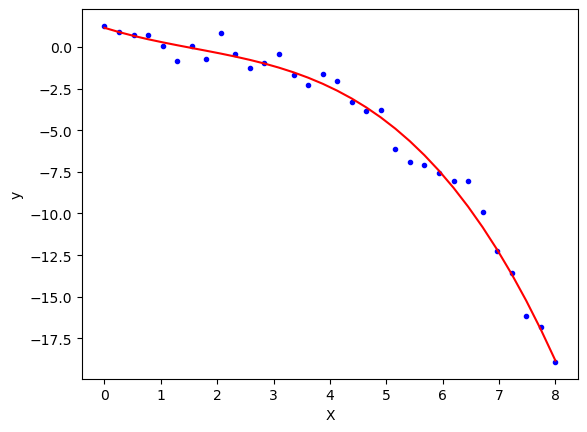

0.3931501227612119


In [53]:
# Use a polynomial with degree of 3
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

poly_reg.fit(X, y)


y_pred = poly_reg.predict(X)

plt.plot(X, y, 'b.')

plt.plot(X, y_pred,c='r')

plt.xlabel('X')
plt.ylabel('y')
plt.savefig('regu-3.png', dpi=200)
plt.show()
print(mean_squared_error(y_pred, y)) 

## 2 Evaluation for Regression Models

Metrics commonly used to evaluate regression models are:

- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-Squared



### 1）Mean Absolute Error

![img](images\MAE.png)

```python
def MAE(y, y_pre):
    return np.mean(np.abs(y - y_pre))
```

**Advantages**

- MAE is not sensitive to outliers. Use MAE when you do not want outliers to play a big role in error calculated.

**Disadvantages**

- MAE is not differentiable globally. This is not convenient when we use it as a loss function, due to the gradient optimization method.

### 2) Mean Squared Error (MSE)

![img](images\MSE.png)
```python
def MSE(y, y_pre):
    return np.mean((y - y_pre) ** 2)
```

**Advantages**

- Graph of MSE is differantiable which means it can be easily used as a loss function.
- MSE can be decomposed into variance and bias squared. This helps us understand the effect of variance or bias in data to the overall error.

![img](images\dF42UODmyd4-qX_m-lPTqw.png)

** Disadvantages**

- The value calculated MSE has a different unit than the target variable since it is squared. (Ex. meter → meter²)
- If there exists outliers in the data, then they are going to result in a larger error. Therefore, MSE is not robust to outliers (this can also be an advantage if you are looking to penalize outliers).





### 3) Root Mean Squared Error (RMSE)

![img](images\RMSE.png)

```python
def RMSE(y, y_pre):
    return np.sqrt(np.mean((y - y_pre) ** 2))
```



**Advantages**

- The error calculated has the same unit as the target variables making the interpretation relatively easier.

**Disadvantages**

- Just like MSE, RMSE is also susceptible to outliers.

### 4) R-Squared

![image-20220923123410702](images\image-20220923123410702.png)

![image-20220923123435789](images\image-20220923123435789.png)

```python
def R2(y, y_pre):
    u = np.sum((y - y_pre) ** 2)
    v = np.sum((y - np.mean(y)) ** 2)
    return 1 - (u / v)
```

Value closer to 1 is better.

 ## 3 [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

<center><img src="images\grid_search_cross_validation.png" alt="grid_search_cross_validation " style="zoom:100%;" /></center>

For more detail: 
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://en.wikipedia.org/wiki/Cross-validation_(statistics)
 
 <center><font size=10> Well done!👏 You have made it. </font></center>

  


## 4 LAB Assignment  
Now it's time to implement linear regression techniques in practice. In this lab, you will use linear regression to fit a house price model. You will use some real-world data as the test set to evaluate your model. 

### 4.1 Before Assignment
#### 4.1.1 Load dataset & Import the required libraries
**Datasets**: scikit-learn provides a number of datasets which can be directly loaded by using a function. First we load a  dataset as an example.

In [76]:
import warnings
from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

See [sklearn website](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) for details. To do this you have to import right packages and modules. 

#### 4.1.2 Preprocessing data
This is a small dataset containing 506 samples and 13 attributes. We need to use proper visualization methods to have an intuitive understanding. We choose the sixth attribute and draw a scattering plot to see the distribution of samples. We use *matplotlib* for data visualization.

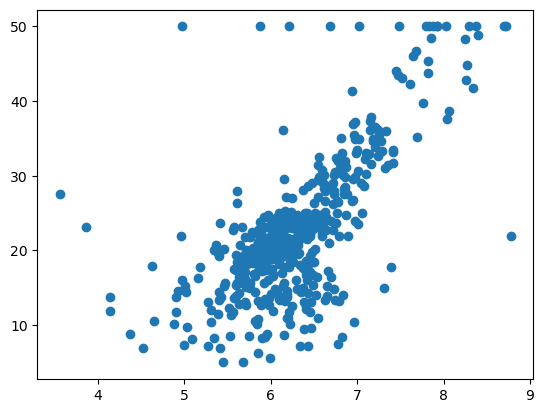

In [77]:
# Use one feature for visualization
x = boston.data[:,5]

# Get the target vector
y = boston.target

# Scattering plot of prive vs. room number
from matplotlib import pyplot as plt
plt.scatter(x,y)
plt.show()

It can be seen that the samples have some exceptional distributions at the top of the plot. They may be outliers owing to some practical operation during the data input (e.g., convert any price larger than 50 into 50). However, these data are harmful to the model training, and should be removed.

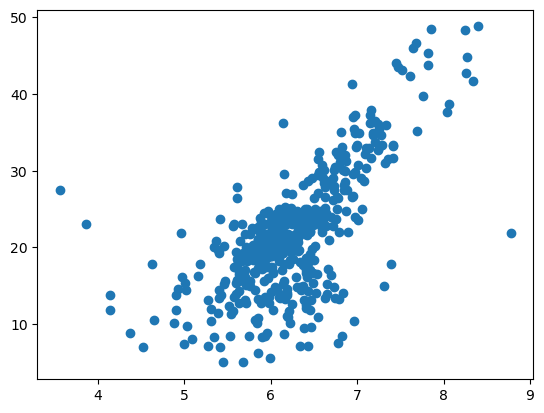

In [78]:
x = x[y<50.0]
y = y[y<50.0]

plt.scatter(x,y)
plt.show()

Now it can be seen that the data is nearly linear, although just in one dimension. Now we use X to denote all attributes

In [75]:
X = boston.data
y = boston.target

X = X[y<50.0]
y = y[y<50.0]

X.shape

(490, 13)

#### 4.1.3 Split data
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train.shape

(15480,)

Usually we also use a validation set. When we use the test set for evaluation, the model will not be changed after the evaluation. However, sometime we want to optimize our model by changing its parameters according to prediction results. The solution is to split a validation set from the training set for adjusting our model. When we believe that the model is good enough, then we evaluate our model on the test set. A more rigorous and costly way is cross validation. With that method, the training set is divided into several pieces in the same size and take every piece as a validation set in turn.

#### 4.1.4 Training 
##### 1) Linear Regression
Now we try to implement a simple linear regression model because the dataset seems linear.

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

The model has been trained just by using a few lines of codes. Now let’s make a prediction for testing

In [62]:
# Make a prediction
y_0_hat = lin_reg.predict(X_test[0].reshape(1,-1))
y_0_hat

array([17.99145573])

In [63]:
y_test[0]

14.1

Notice that in scikit-learn, the standard interface for machine learning is
1) instantiate a learner with super parameters or none; 
2) use `fit()` method and feed the learner with training data; 
3) use `predict()` for prediction. 

Moreover, the data preprocessing algorithms also have the same interface, they just use `transform()` instead of `predict()`.

Below are the trained parameters.

In [64]:
lin_reg.coef_

array([-1.24143014e-01,  3.44659702e-02, -1.08808701e-01,  1.81305890e-01,
       -1.07954247e+01,  3.58033630e+00, -1.70292872e-02, -1.19026724e+00,
        3.19775631e-01, -1.60081950e-02, -7.83309917e-01,  7.67810088e-03,
       -3.39052027e-01])

In [49]:
lin_reg.intercept_

35.02935979470841

Use the evaluation method to see if it is a good model. The `score()` method uses R-square.

In [65]:
lin_reg.score(X_test, y_test)

0.7595299927902152

##### 2) Polynomial Regression
If you have understood the concept of linear regression, you can easily implement polynomial regression. 

#### 4.1.5 Evaluation model
Checking the results on test set。

### 4.2 LAB Assignment
Please use the real world dataset, **California housing price**, for model training and evaluate the model’s prediction performance. You can use simple linear regression, polynomial regression or more complicated base functions such as Gaussian function or use regularization methods. Make sure at least **20% data for testing** and choose one evaluation method you think good. **Please do not just train your model and say that is good enough, you need to analyze the bias and variance**. For that end, validation or cross validation is needed. Compare the score in the training set and the validation set. If they are both good enough, then use the model on the test set.

**Your test set can only be used for final evaluation!**

In [51]:
########### Write Your Code Here ###########

############################################

### 4.3 Questions
1) Describe another real-world application where the regression method can be applied
2) What are the strengths of the linear/polynomial regression methods; when do they perform well?
3) What are the weaknesses of the linear/polynomial regression methods; when do they perform poorly?
4) What makes the linear regression method a good candidate for the regression problem, if you have enough knowledge about the data?

<center><font size=6>Please complete lab4 Assignment  , and submit the result to bb  as required (Lab02_Assignment_Template.ipynb ) </font></center>